In [11]:
import numpy as np
from qiskit import *
%matplotlib inline

# Kwantowe błądzenie losowe
Kwantowe błądzenie losowe to matematyczny model ruchu cząstki poruszającej się w danym środowisku w sposób przypadkowy.
Zajmujemy się szczególnym przypadkiem gdzie długość kroku wędrownika jest stała, a wędrownik porusza się po okręgu.
W błądzeniu kwantowym, zamiast monety, używamy bramki unitarnej (np.: Hadamarda).
Wędrownik zaczyna na godzinie 12 (00). Jeśli pójdzie w prawo trafi na (01), jeśli w lewo (11).
Dwa górne kubity reprezentują pozycję. Dolny kubit przeznaczony jest dla monety, która bedzie wpływać na bramki poruszania się (inkrement, dekrement).
Przed każdym krokiem rzucamy monetą.

### Krok 0
Wędrownik zaczyna w pozycji 00.

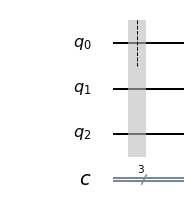

In [12]:
circ = QuantumCircuit(3,3)
circ.barrier(0)
circ.draw()

In [13]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


100% prawdopodobieństwa, że wędrownik znajduje się w pozycji 00.

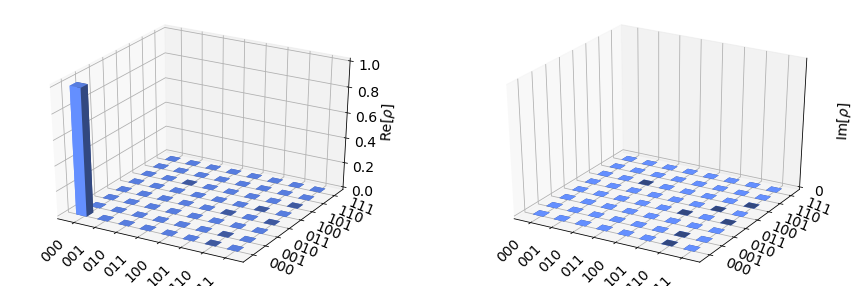

In [14]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

# Krok 1
Rzucamy monetą. Przechodzimy przez inkrement i dekrement.

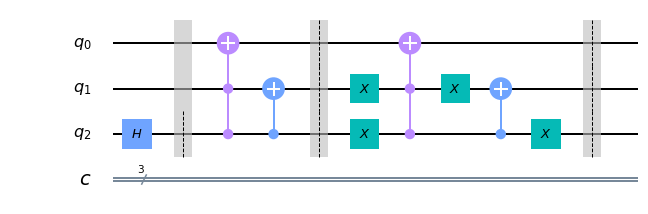

In [15]:
circ = QuantumCircuit(3,3)
circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()
circ.draw()

In [16]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.   +0.j 0.   +0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j
 0.   +0.j]


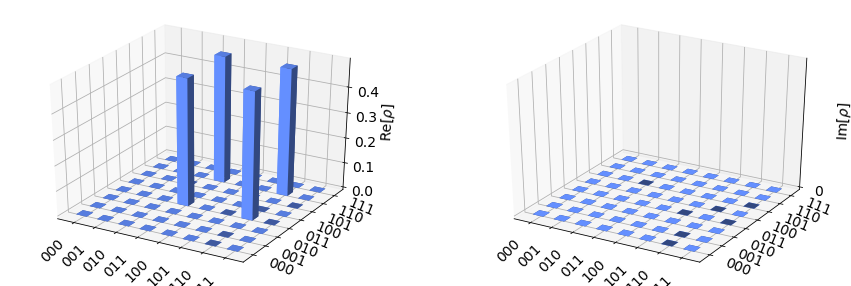

In [17]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

50% prawdopodobieństwa, że wędrownik znajduje się na pozycji 01 i 50%, że na pozycji 11.

(czytając od lewej: q2, q1, q0; q0q1 kodują pozycję, q2 ignorujemy - stan monety)


# Krok 2
Ponownie rzucamy monetą i przechodzimy przez inkrement i dekrement.

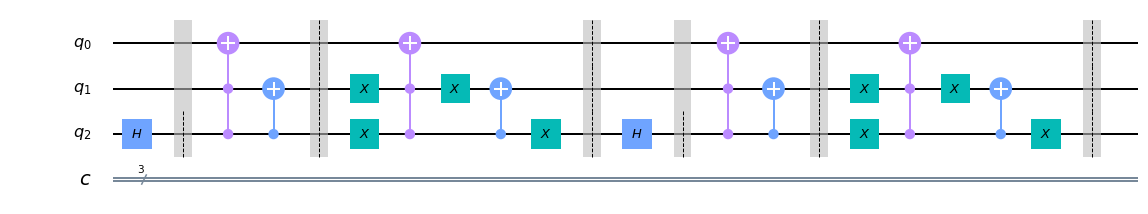

In [18]:
circ = QuantumCircuit(3,3)
circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()
circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()
circ.draw()

In [19]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[ 0.5-0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j  0. +0.j]


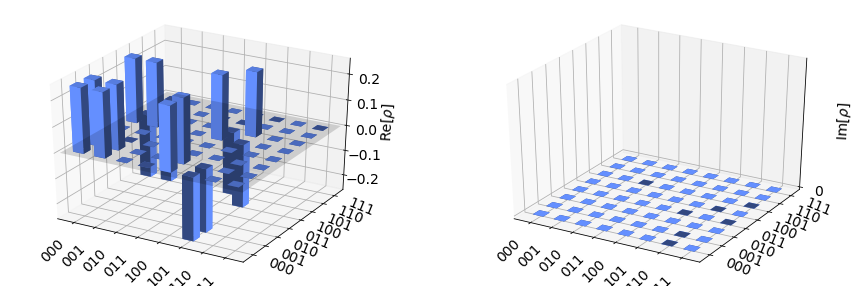

In [20]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

25% prawdopodobieństwa dla 000, oraz 25% dla 100, co razem daje 50% dla 00, gdyż nie interesuje nas stan monety.

25% prawdopodobieństwa dla 001, oraz 25% dla 101, co razem daje 50% dla 10, gdyż nie interesuje nas stan monety.

(czytając od lewej: q2, q1, q0; q0q1 kodują pozycję, q2 ignorujemy - stan monety)

# Krok 3
Ostatni raz rzucamy monetą i rzechodzimy przez inkrement i dekrement.

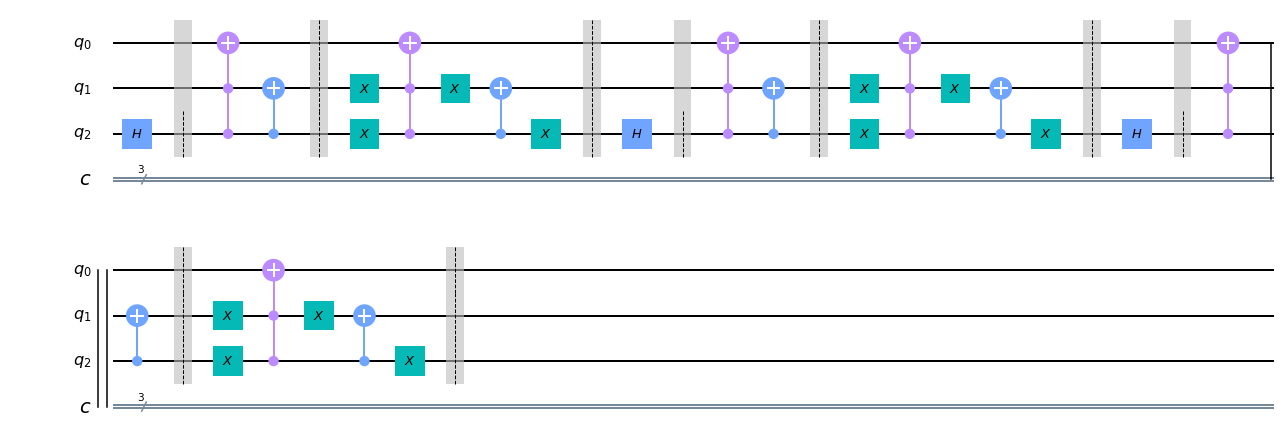

In [21]:
circ = QuantumCircuit(3,3)
circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()

circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()

circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()
circ.draw()

In [22]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[ 0.   +0.j  0.   +0.j  0.   +0.j  0.707-0.j  0.   +0.j  0.   +0.j
 -0.   +0.j  0.707-0.j]


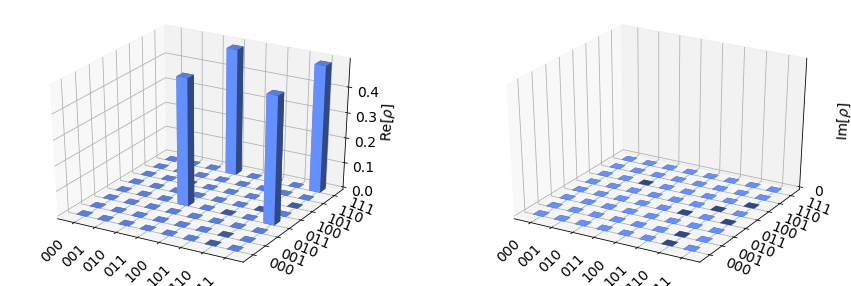

In [23]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

50% prawdopodobieństwa dla 011, oraz 50% dla 111, co razem daje 100% dla 11, gdyż nie interesuje nas stan monety.

(czytając od lewej: q2, q1, q0; q0q1 kodują pozycję, q2 ignorujemy - stan monety)

## Podsumowanie
Wynik przeprowadzonych symulacji zgadzają się  wynikami zadania obliczeniowego umieszczonymi w pliku obliczeniowe1.jpg.